In [1403]:
import os
import glob
import re
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rc('font',size=10)

In [1404]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [1405]:
# method to download latest data directly from facebook?

In [1406]:

# https://github.com/quynhneo/arxiv-public-datasets_for_kaggle/blob/master/arxiv_public_data/fulltext.py
def sorted_files(globber: str):
    """
    Give a globbing expression of files to find. They will be sorted upon
    return.  This function is most useful when sorting does not provide
    numerical order,
    e.g.:
        9 -> 12 returned as 10 11 12 9 by string sort
    In this case use num_sort=True, and it will be sorted by numbers in the
    string, then by the string itself.
    Parameters
    ----------
    globber : str
        Expression on which to search for files (bash glob expression)
    """
    files = glob.glob(globber, recursive = True) # return a list of path, including sub directories
    files.sort()

    allfiles = []

    for fn in files:
        nums = re.findall(r'\d+', fn) # regular expression, find number in path names
        data = [str(int(n)) for n in nums] + [fn]
        # a list of [first number, second number,..., filename] in string format otherwise sorted fill fail
        allfiles.append(data) # list of list

    allfiles = sorted(allfiles)
    return [f[-1] for f in allfiles] # sorted filenames

In [1407]:
path = 'roxanne_messages'
globber = os.path.join(path, '*.json')
jsonfiles = sorted_files(globber)

In [1408]:
def json_to_message(file):
    """load message to data frame, decode content and sender_name, convert time stamp to date"""
    data = json.load(open(file,'r'))
    df=pd.DataFrame(data['messages'])
    df.content = df.content.apply(lambda x: str(x).encode('latin1').decode('utf8'))
    df.sender_name = df.sender_name.apply(lambda x: str(x).encode('latin1').decode('utf8'))
    df.timestamp_ms = df.timestamp_ms.apply(lambda x: datetime.date.fromtimestamp(x/1000) )
    return df

In [1409]:
# iterate list of files, load data into data frame, and join them
frame =[]
for file in jsonfiles:
    df = json_to_message(file)
    frame.append(df)
df = pd.concat(frame)

In [1410]:
# n_total=0
# n_content =0
# n_time=0
# for msg in data['messages']:
#     n_total +=1
#     print(datetime.date.fromtimestamp(msg['timestamp_ms']/1000),
#     "\n ---")
#     try:
#         print(msg['content'].encode('latin1').decode('utf8'))
#         n_content +=1

#     except:
#         pass
    

In [1411]:
# create generic names
generic_names=pd.DataFrame(['user'+ str(i) for i in range(0,df.sender_name.unique().shape[0]+1) ])

In [1412]:
# replace user names with generic names
dictionary=dict(zip(list(df.sender_name.unique()),list(generic_names.iloc[:,0])))


In [1413]:
df.sender_name.replace(dictionary,inplace=True)
df.sender_name.unique()
#df.sender_name=df.sender_name.apply(lambda x: "".join([name[0] for name in x.split()]) )

array(['user0', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6',
       'user7', 'user8', 'user9', 'user10', 'user11', 'user12', 'user13'],
      dtype=object)

In [1414]:
# will remove inactive user from data, active user (every month in data) will be used to get the month 
inactive_user='user13'
active_user='user1'

In [1415]:
df[['sender_name','timestamp_ms','content']].sort_values('timestamp_ms').tail()

,sender_name,timestamp_ms,content
4,user0,2021-01-18,trời oiiiiiiii món này sinh ra từ khi nào vậy ...
3,user0,2021-01-19,nan
2,user0,2021-01-19,hixx
1,user1,2021-01-19,"full of sugar, bad fo ya"
0,user0,2021-01-19,"a whole cube of joy, very good fo ya =))"


In [1416]:
# bin data by month: sending frequencies, sending frequencies by senders, top few words 

In [1417]:
# who send the most messages?
df.groupby('sender_name').count().reset_index().sort_values('content',ascending=False)\
[['sender_name','sticker','content','reactions']].rename(columns={'content':'messages'}).reset_index(drop=True)

,sender_name,sticker,messages,reactions
0,user0,1237,19098,5704
1,user3,40,18634,3814
2,user7,4,8548,1879
3,user6,336,6742,1167
4,user2,244,6114,1748
5,user1,14,6077,2318
6,user12,99,5914,1770
7,user8,2,3555,1248
8,user4,20,3529,962
9,user10,6,2252,644


In [1418]:
df_by_month = df[['sender_name','timestamp_ms','content']]

df_by_month['month'] = df_by_month.timestamp_ms.\
apply(lambda x: datetime.datetime(x.year, x.month, 1))


<ipython-input-1418-5eefcfbf9272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_month['month'] = df_by_month.timestamp_ms.\


In [1419]:
df_by_month.head(10)

,sender_name,timestamp_ms,content,month
0,user0,2021-01-19,"a whole cube of joy, very good fo ya =))",2021-01-01
1,user1,2021-01-19,"full of sugar, bad fo ya",2021-01-01
2,user0,2021-01-19,hixx,2021-01-01
3,user0,2021-01-19,nan,2021-01-01
4,user0,2021-01-18,trời oiiiiiiii món này sinh ra từ khi nào vậy ...,2021-01-01
5,user0,2021-01-18,mấy anh chị em tránh xa mấy nơi manh động nha!!,2021-01-01
6,user0,2021-01-18,"trời mà nhắc mới nhớ, hị hị bảo sao 3h sáng đê...",2021-01-01
7,user1,2021-01-18,2 more days of Trump! Wed có thể sẽ thú vị he he.,2021-01-01
8,user2,2021-01-16,Dạ nó thực ra ko tốn nhiều thgian. Chẳng qua k...,2021-01-01
9,user3,2021-01-16,Same here. Đợt nào làm k ra lad xuống kí liền....,2021-01-01


In [1420]:
msg_per_day=df_by_month[['sender_name','timestamp_ms','month']]
# remove the last month manually
msg_per_day=msg_per_day[msg_per_day.month != datetime.datetime(2021,1,1)]
msg_per_day=msg_per_day[['sender_name','timestamp_ms']].groupby(['timestamp_ms']).\
count().reset_index().rename(columns={"sender_name":"msg_num"})
msg_per_day.shape

(444, 2)

In [1421]:
msg_per_day.timestamp_ms.iloc[-1:]

443    2020-12-28
Name: timestamp_ms, dtype: object

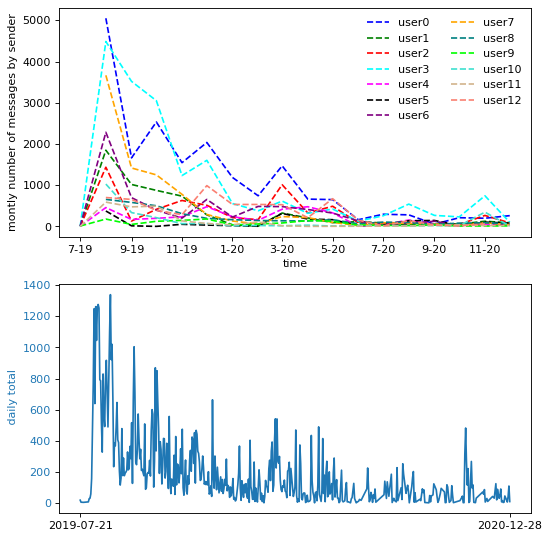

In [1422]:
# plot senders by month
# iterate sender names, plot content vs time
from cycler import cycler
# list of names
names=df_by_month.sender_name.unique()
names=names[names != inactive_user]

months=df_by_month[df_by_month.sender_name==active_user].\
    groupby('month').count().reset_index().month
# tickmark time
timemarks=[str(x.month) +'-'+ str(x.year-2000) for x in months]


fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
ax, ax2 = axes.flatten()

colorcycle = cycler('color', ['blue', 'green', 'red', 'cyan', 'magenta',  'black', 'purple',
                                    'orange', 'teal',  'lime', 
                                    'turquoise', 'tan', 'salmon', 'gold'])
ax.set_prop_cycle(colorcycle)

# plot by month, drop last month
for name in names:
    xx= df_by_month[df_by_month.sender_name==name].\
    groupby('month').count().reset_index() # sender vs number of messages
    
    ax.plot(xx.month.iloc[:-1],xx.content.iloc[:-1],'--',label=name.split()[0])
    

# ax.legend(frameon=False, bbox_to_anchor=(0., 1.1, 1., .102), loc='lower left',
#                ncol=3, mode="expand", borderaxespad=0.)
ax.legend(frameon=False, loc='upper right',
               ncol=2)
ax.set_prop_cycle(colorcycle)
#plt.yscale('log')


ax.set_ylabel('montly number of messages by sender')
ax.set_xlabel('time')
ax.set_xticklabels(timemarks[:-1][0::2])
#ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(' daily total', color=color)  # we already handled the x-label with ax1
ax2.plot(msg_per_day.timestamp_ms, msg_per_day.msg_num, '-',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(msg_per_day.timestamp_ms[::len(msg_per_day.timestamp_ms)-1])
ax2.set_xticklabels(msg_per_day.timestamp_ms[::len(msg_per_day.timestamp_ms)-1])
#ax2.set_xticklabels(msg_per_day.timestamp_ms.apply(lambda x:str(x.day)+'-'+ str(x.month))[0::30])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [1423]:
time_content= df_by_month[['month','content']]
time_content.head()

,month,content
0,2021-01-01,"a whole cube of joy, very good fo ya =))"
1,2021-01-01,"full of sugar, bad fo ya"
2,2021-01-01,hixx
3,2021-01-01,nan
4,2021-01-01,trời oiiiiiiii món này sinh ra từ khi nào vậy ...


transform will act on the group, but return the same number of rows

In [1424]:
time_content.content =time_content.groupby('month')['content'].transform(lambda x: ",".join(x))

/Users/qmn203/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [1425]:
time_content.head()

,month,content
0,2021-01-01,"a whole cube of joy, very good fo ya =)),full ..."
1,2021-01-01,"a whole cube of joy, very good fo ya =)),full ..."
2,2021-01-01,"a whole cube of joy, very good fo ya =)),full ..."
3,2021-01-01,"a whole cube of joy, very good fo ya =)),full ..."
4,2021-01-01,"a whole cube of joy, very good fo ya =)),full ..."


In [1426]:
monthly=time_content.content.drop_duplicates()
monthly.shape

(19,)

In [1427]:
import collections
#table=pd.DataFrame({'tiền':[],'yêu':[], 'gái':[], 'ăn':[], 'chơi':[],'học':[]})
table=pd.DataFrame({'😂':[],'😅':[], '😇':[],'😉':[],
                    '😳':[],'😆':[],'😜':[],'😕':[],'😍':[],'ngủ':[],'stock':[]})
table.columns

Index(['😂', '😅', '😇', '😉', '😳', '😆', '😜', '😕', '😍', 'ngủ', 'stock'], dtype='object')

In [1428]:
lol=[]

for mo in monthly.iloc[:-1]:
    splitt = mo.lower().split()
    ll=[]
    for word in table.columns:
        ll.append(collections.Counter(splitt)[word]/len(splitt))
        #print(collections.Counter(split).most_common(100))
    lol.append(ll)

table=table.append(pd.DataFrame(lol,columns = table.columns))
    

In [1429]:
table.head()

,😂,😅,😇,😉,😳,😆,😜,😕,😍,ngủ,stock
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000227,0.000227,0.000907
1,0.000396,0.000132,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.000241,0.000060,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000120,0.000962
3,0.000371,0.000186,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.001486,0.000371
4,0.000294,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000294,0.002204


In [1430]:
months

0    2019-07-01
1    2019-08-01
2    2019-09-01
3    2019-10-01
4    2019-11-01
5    2019-12-01
6    2020-01-01
7    2020-02-01
8    2020-03-01
9    2020-04-01
10   2020-05-01
11   2020-06-01
12   2020-07-01
13   2020-08-01
14   2020-09-01
15   2020-10-01
16   2020-11-01
17   2020-12-01
18   2021-01-01
Name: month, dtype: datetime64[ns]

In [1431]:

mpl.rc('font',size=20)

Text(0.5, 1.0, 'some common emoticons')

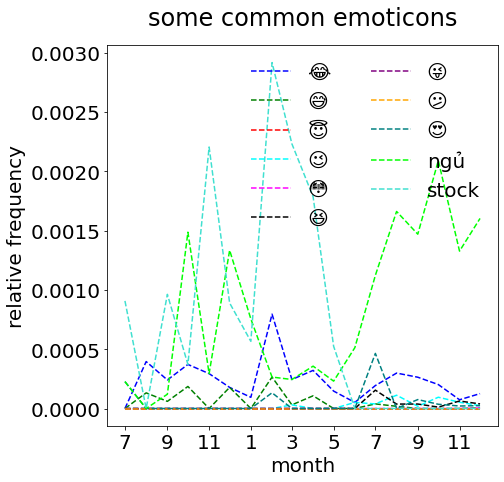

In [1432]:
fig,ax = plt.subplots(figsize=(7, 7))
ax.set_prop_cycle(colorcycle)
for word in table.columns:
    plt.plot(months.iloc[:-1], table[word],'--',label= str(word) )
    
# ax.legend(frameon=False, bbox_to_anchor=(0., 1.1, 1., .102), loc='lower left',
#                ncol=3, mode="expand", borderaxespad=0.)
ax.legend(frameon=False, loc='upper right',
               ncol=2, )
#plt.yscale('log')

ax.set_xticklabels([x.split('-')[0] for x in timemarks][0::2])
ax.set_ylabel('relative frequency')
ax.set_xlabel('month')
ax.set_title('some common emoticons')

In [1433]:
# getting sender and reactions
send_react=df[['sender_name','reactions']]
print(send_react.shape)


(85543, 2)


In [1434]:
# number of messages sent by senders
num_of_msg = df[['sender_name']]
num_of_msg.insert(1, value=np.ones(send_react.shape[0]),column='count')
num_of_msg=num_of_msg.groupby('sender_name').count().reset_index().sort_values(by='sender_name')
num_of_msg=num_of_msg[num_of_msg.sender_name !=inactive_user]
num_of_msg

,sender_name,count
0,user0,19098
1,user1,6077
2,user10,2252
3,user11,2040
4,user12,5914
6,user2,6114
7,user3,18634
8,user4,3529
9,user5,1741
10,user6,6742


parse each reactions into a list of reactor names [{'reaction': 'haha', 'actor': 'user1'},{ 'reaction': 'lol', 'actor': 'user2'},...] --> [user1,user2,...]

In [1435]:
send_react.reactions[~pd.isna(send_react.reactions)] =send_react.reactions[~pd.isna(send_react.reactions)].apply(lambda x: [react['actor'] for react in x])


/Users/qmn203/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/Users/qmn203/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [1436]:
# abbreivate names abc def ghk-> adg

# send_react.reactions[~pd.isna(send_react.reactions)]=send_react.reactions[~pd.isna(send_react.reactions)].\
# apply(lambda x: ["".join([name[0] for name in actor.split()]) for actor in x])

# OR replace names by generic names


In [1437]:
# expand list of name in reactions column into new rows, each row one name, other columns will be repeated
send_react=send_react.explode('reactions')
# decode the names
send_react.reactions[~pd.isna(send_react.reactions)]=\
send_react.reactions[~pd.isna(send_react.reactions)].apply(lambda x: x.encode('latin1').decode('utf8'))
#  replace names by generic names
send_react.reactions.replace(dictionary,inplace=True)

send_react.shape
send_react.head()

,sender_name,reactions
0,user0,NaN
1,user1,user2
1,user1,user11
1,user1,user9
2,user0,NaN


In [1438]:
# insert column of 1 for counting
send_react.insert(2, value=np.ones(send_react.shape[0]),column='count')
send_react.shape # number of reaction is slightly larger than number of message sent

(95481, 3)

In [1439]:
# remove inactive user manually
send_react=send_react[(send_react.sender_name != inactive_user) & (send_react.reactions != inactive_user) ]
send_react.head()

,sender_name,reactions,count
0,user0,NaN,1.0
1,user1,user2,1.0
1,user1,user11,1.0
1,user1,user9,1.0
2,user0,NaN,1.0


In [1440]:
# groupby sender and reactor, and count (dropna=True default)
send_react=send_react.groupby(['sender_name','reactions']).count().reset_index().sort_values(by=['sender_name','reactions'])

In [1441]:
# turn into num_user**2 matrix
interaction = send_react.pivot(index='sender_name',columns='reactions',values='count')


In [1442]:
interaction # raw number of reactions 

reactions,user0,user1,user10,user11,user12,user2,user3,user4,user5,user6,user7,user8,user9
sender_name,,,,,,,,,,,,,
user0,NaN,1101.0,103.0,1183.0,183.0,883.0,1142.0,446.0,2.0,219.0,894.0,551.0,1291.0
user1,680.0,15.0,72.0,518.0,80.0,268.0,574.0,170.0,6.0,108.0,506.0,195.0,524.0
user10,184.0,107.0,NaN,86.0,17.0,75.0,135.0,23.0,NaN,14.0,145.0,21.0,68.0
user11,335.0,97.0,19.0,NaN,36.0,91.0,181.0,44.0,NaN,15.0,102.0,103.0,126.0
user12,648.0,68.0,25.0,290.0,NaN,206.0,386.0,69.0,NaN,51.0,249.0,101.0,336.0
user2,790.0,232.0,18.0,220.0,53.0,1.0,296.0,102.0,5.0,77.0,149.0,239.0,390.0
user3,882.0,687.0,85.0,614.0,144.0,400.0,8.0,235.0,1.0,120.0,811.0,374.0,640.0
user4,272.0,74.0,17.0,133.0,16.0,65.0,278.0,NaN,NaN,32.0,170.0,71.0,236.0
user5,82.0,91.0,27.0,41.0,14.0,128.0,116.0,32.0,NaN,38.0,96.0,42.0,141.0


In [1443]:
interarray=interaction.to_numpy()

In [1444]:
np.set_printoptions(precision=3)
print(interarray)

[[  nan 1101.  103. 1183.  183.  883. 1142.  446.    2.  219.  894.  551.
  1291.]
 [ 680.   15.   72.  518.   80.  268.  574.  170.    6.  108.  506.  195.
   524.]
 [ 184.  107.   nan   86.   17.   75.  135.   23.   nan   14.  145.   21.
    68.]
 [ 335.   97.   19.   nan   36.   91.  181.   44.   nan   15.  102.  103.
   126.]
 [ 648.   68.   25.  290.   nan  206.  386.   69.   nan   51.  249.  101.
   336.]
 [ 790.  232.   18.  220.   53.    1.  296.  102.    5.   77.  149.  239.
   390.]
 [ 882.  687.   85.  614.  144.  400.    8.  235.    1.  120.  811.  374.
   640.]
 [ 272.   74.   17.  133.   16.   65.  278.   nan   nan   32.  170.   71.
   236.]
 [  82.   91.   27.   41.   14.  128.  116.   32.   nan   38.   96.   42.
   141.]
 [ 383.  195.   10.  116.   38.  175.  192.   34.   nan    1.  131.   75.
   239.]
 [ 537.  342.   48.  248.   62.  169.  587.  216.    4.   47.    1.  139.
   282.]
 [ 428.  189.   27.  292.   42.  205.  234.   74.    1.   33.  128.    5.
   269.]
 [ 2

In [1445]:
# divide column by vector: normalize number of reaction by number of messages sent
# because the default divide is by row, thus transpose twice to divide column by vector 
# replace nan by 0
norm_interact=np.nan_to_num( np.transpose(np.divide( np.transpose(interarray),num_of_msg['count'].to_numpy())),copy=False)
norm_interact

array([[0.   , 0.058, 0.005, 0.062, 0.01 , 0.046, 0.06 , 0.023, 0.   ,
        0.011, 0.047, 0.029, 0.068],
       [0.112, 0.002, 0.012, 0.085, 0.013, 0.044, 0.094, 0.028, 0.001,
        0.018, 0.083, 0.032, 0.086],
       [0.082, 0.048, 0.   , 0.038, 0.008, 0.033, 0.06 , 0.01 , 0.   ,
        0.006, 0.064, 0.009, 0.03 ],
       [0.164, 0.048, 0.009, 0.   , 0.018, 0.045, 0.089, 0.022, 0.   ,
        0.007, 0.05 , 0.05 , 0.062],
       [0.11 , 0.011, 0.004, 0.049, 0.   , 0.035, 0.065, 0.012, 0.   ,
        0.009, 0.042, 0.017, 0.057],
       [0.129, 0.038, 0.003, 0.036, 0.009, 0.   , 0.048, 0.017, 0.001,
        0.013, 0.024, 0.039, 0.064],
       [0.047, 0.037, 0.005, 0.033, 0.008, 0.021, 0.   , 0.013, 0.   ,
        0.006, 0.044, 0.02 , 0.034],
       [0.077, 0.021, 0.005, 0.038, 0.005, 0.018, 0.079, 0.   , 0.   ,
        0.009, 0.048, 0.02 , 0.067],
       [0.047, 0.052, 0.016, 0.024, 0.008, 0.074, 0.067, 0.018, 0.   ,
        0.022, 0.055, 0.024, 0.081],
       [0.057, 0.029, 0.001,

In [1446]:
labels=interaction.select_dtypes(['number']).columns


Showing sending-reacting matrix 

Text(0, 0.5, 'sent by')

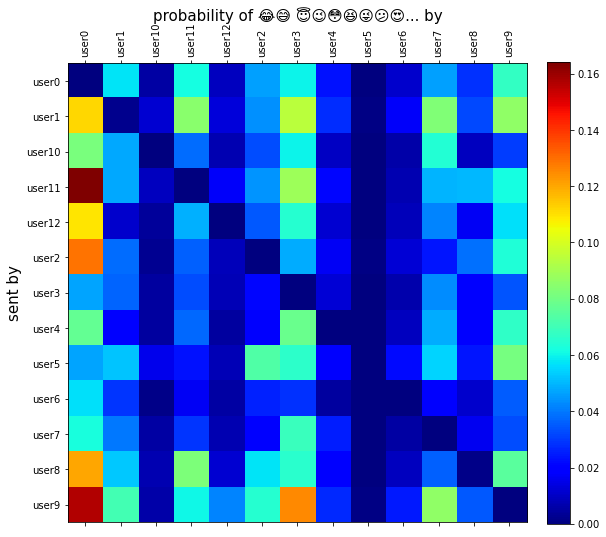

In [1447]:
f = plt.figure(figsize=(9, 9))
plt.matshow(norm_interact, fignum=f.number,cmap=plt.cm.jet)
plt.xticks(range(interaction.select_dtypes(['number']).shape[1]),labels , fontsize=10, rotation=90)
plt.yticks(range(interaction.select_dtypes(['number']).shape[1]), labels, fontsize=10)
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize=10)
plt.rcParams['axes.titlepad'] = 20
plt.title('probability of 😂😅 😇😉😳😆😜😕😍... by',fontsize=15)
plt.ylabel('sent by',fontsize=15)

For example, user0 is the most reactive user, who react the most to message sent by user 11. user5 is the least reactive user.